# HOMEWORK 01

## MODULES IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import imageio.v2 as imageio
from IPython.display import HTML

## FUNCTIONS DEFINITION

In [2]:
def l2norm(u):
    return np.sum(u**2) / len(u)

# Integrator for FTCS, LF, LW
def integrate(u_in, t_f, method, par=[10, 101, 1, .5]):
    L, N, a, cf = par
    
    x, dx = np.linspace(0, L, N), L / (N - 1)
    dt = cf * dx / a
    time = np.arange(int(t_f / dt) + 1) * dt

    u_f = []
    norm = []

    u_cur = u_in.copy()

    u_f.append(u_cur)
    norm.append(l2norm(u_cur))
    for i in range(len(time) - 1):
        u_next = method(u_cur, dt, dx, a)
        u_cur = u_next.copy()
        
        u_f.append(u_cur)
        norm.append(l2norm(u_cur))

    return time, np.array(u_f), np.array(norm)

In [3]:
# METHODS
# NOTE: all methods are implemented using periodic boundary conditions (using np.roll)

# Forward in Time Centered in Space
def FTCS(u_cur, dt, dx, a):
    u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
    return u_cur - a * dt / (2 * dx) * (u_jp - u_jm)

# Lax - Friedrichs
def LF(u_cur, dt, dx, a):
    u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
    return .5 * (u_jp - u_jm) - a * dt / (2 * dx) * (u_jp - u_jm)

# Lax - Wendroff
def LW(u_cur, dt, dx, a):
    u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
    return u_cur - a * dt / (2 * dx) * (u_jp - u_jm) + (a * dt / dx)**2 / 2 * (u_jp - 2 * u_cur + u_jm)

In [4]:
# LEAPFROG METHOD

def leapfrog(u_in, t_f, par=[10, 101, 1, .5]):
    L, N, a, cf = par
    
    x, dx = np.linspace(0, L, N), L / (N - 1)
    dt = cf * dx / a
    time = np.arange(int(t_f / dt) + 1) * dt

    u_f = []
    norm = []

    u_prev = u_in.copy()
    u_cur = FTCS(u_prev, dt, dx, a)

    u_f.append(u_prev)
    norm.append(l2norm(u_prev))
    u_f.append(u_cur)
    norm.append(l2norm(u_cur))
    for i in range(len(time) - 2):
        u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
        u_next = u_prev - a * dt / dx * (u_jp - u_jm)

        u_prev = u_cur.copy()
        u_cur = u_next.copy()
        
        u_f.append(u_cur)
        norm.append(l2norm(u_cur))

    return time, np.array(u_f), np.array(norm)

# 1 - ADVECTION EQUATION
Solve the advection equation $\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0$, with $a = 1$ and intial condition:

$u(x, t = 0) = \exp[-(x - x_0)^2]$


In [5]:
# SET UP

# Define the speed a
a = 1.0

# Define the domain
L, N = 10.0, 101   # domain length, number of grid points
dx = L / (N - 1)   # grid spacing
x = np.linspace(0, L, N)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
t_f = 20.0

# Define the initial condition
x0 = 5
u_in = np.exp(-(x - x0)**2)

## FTCS

In [62]:
# Solve the equation with FTCS

time, u_f, norm = integrate(u_in, t_f, FTCS, [L, N, a, cf])

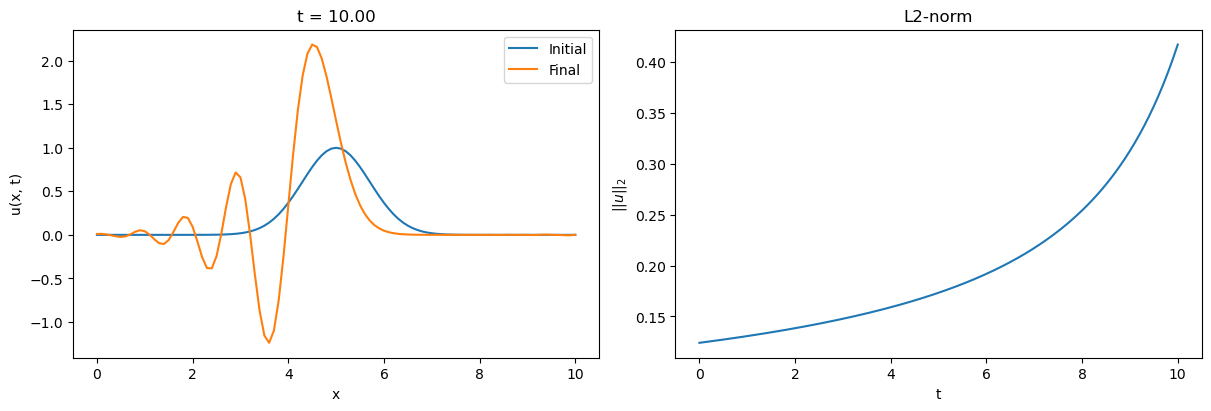

In [64]:
# Plot the final solution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

ax1.plot(x, u_in, label='Initial')
ax1.plot(x, u_f[-1], label='Final')
#ax1.plot(x, np.exp(-(x - a * time[-1] - x0)**2), label='Analytical')

ax1.set_title(f't = {time[-1]:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x, t)')
#ax1.set_ylim(0,1.1)

ax1.legend()


ax2.plot(time, norm)
ax2.set_yscale('log')

ax2.set_title('L2-norm')
ax2.set_xlabel('t')
ax2.set_ylabel(r'$||u||_{2}$')

plt.show()

## Lax - Friedrichs

In [75]:
# Solve the equation with Lax - Friedrichs

time, u_f, norm = integrate(u_in, t_f, LF, [L, N, a, cf])

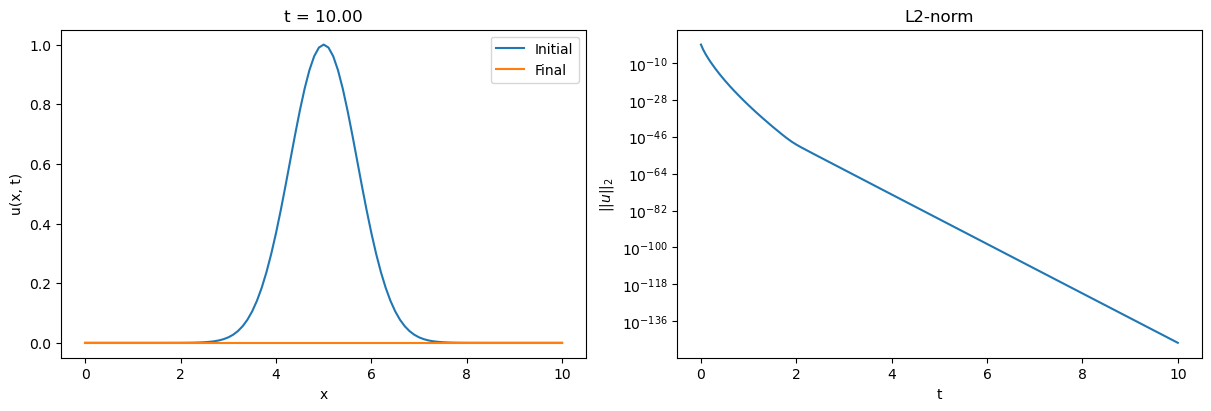

In [76]:
# Plot the final solution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

ax1.plot(x, u_in, label='Initial')
ax1.plot(x, u_f[-1], label='Final')
#ax1.plot(x, np.exp(-(x - a * time[-1] - x0)**2), label='Analytical')

ax1.set_title(f't = {time[-1]:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x, t)')
#ax1.set_ylim(0,1.1)

ax1.legend()


ax2.plot(time, norm)
ax2.set_yscale('log')

ax2.set_title('L2-norm')
ax2.set_xlabel('t')
ax2.set_ylabel(r'$||u||_{2}$')

plt.show()

## Lax - Wendroff

In [6]:
# Solve the equation with Lax - Wendroff

time, u_f, norm = integrate(u_in, t_f, LW, [L, N, a, cf])

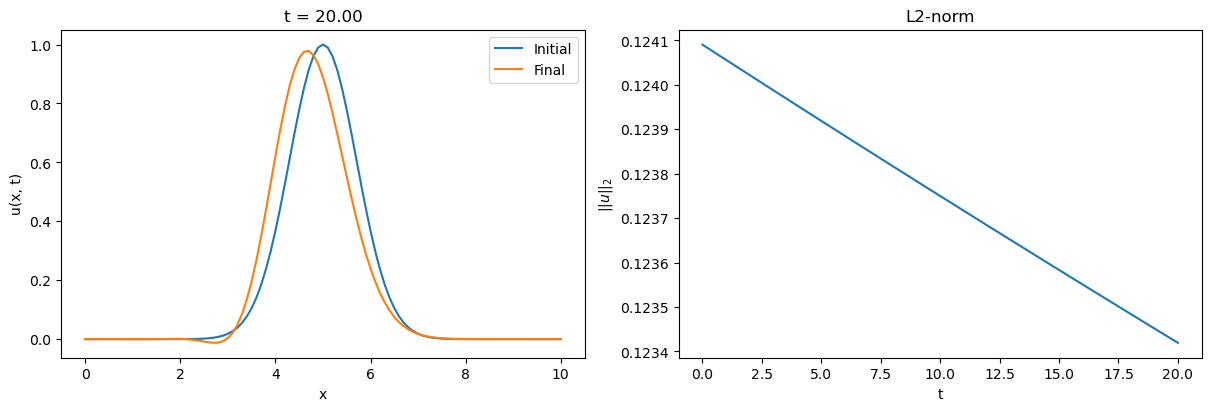

In [7]:
# Plot the final solution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

ax1.plot(x, u_in, label='Initial')
ax1.plot(x, u_f[-1], label='Final')
#ax1.plot(x, np.exp(-(x - a * time[-1] - x0)**2), label='Analytical')

ax1.set_title(f't = {time[-1]:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x, t)')
#ax1.set_ylim(0,1.1)

ax1.legend()


ax2.plot(time, norm)
#ax2.set_yscale('log')

ax2.set_title('L2-norm')
ax2.set_xlabel('t')
ax2.set_ylabel(r'$||u||_{2}$')

plt.show()

## Leapfrog

In [8]:
# Solve the equation with Leapfrog

time, u_f, norm = leapfrog(u_in, t_f, [L, N, a, cf])

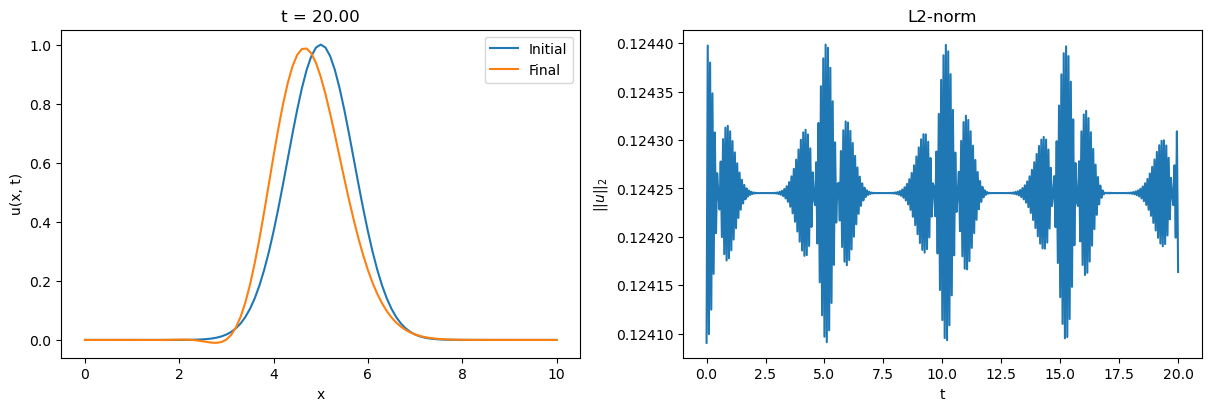

In [9]:
# Plot the final solution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

ax1.plot(x, u_in, label='Initial')
ax1.plot(x, u_f[-1], label='Final')
#ax1.plot(x, np.exp(-(x - a * time[-1] - x0)**2), label='Analytical')

ax1.set_title(f't = {time[-1]:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x, t)')
#ax1.set_ylim(0,1.1)

ax1.legend()


ax2.plot(time, norm)
#ax2.set_yscale('log')

ax2.set_title('L2-norm')
ax2.set_xlabel('t')
ax2.set_ylabel(r'$||u||_{2}$')

plt.show()

# 3 - BURGER'S EQUATION

In [3]:
# SET UP

# Define the domain
L, N = 10.0, 101   # domain length, number of grid points
dx = L / (N - 1)   # grid spacing
x = np.linspace(0, L, N)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
t_f = 0.5

# Define the initial condition
x0 = 5
u_in = 10 * np.exp(-(x - x0)**2)

a = np.max(np.abs(u_in))

## Non flux conservative scheme

In [4]:
def NFC(u_cur, dt, dx, a=1):
    u_jm = np.roll(u_cur, 1)
    return u_cur - dt / dx * u_cur * (u_cur - u_jm)

In [14]:
time, u_nfc, norm = integrate(u_in, t_f, NFC, [L, N, a, cf])

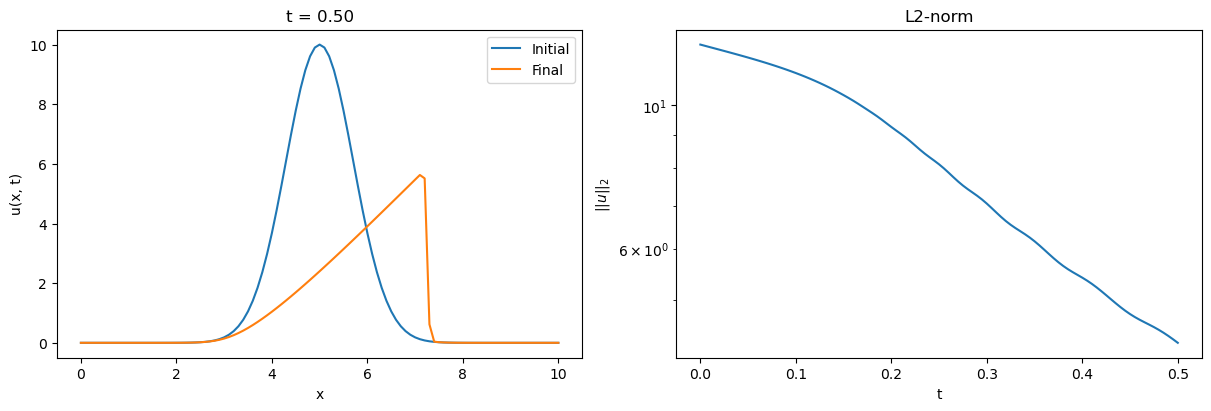

In [6]:
# Plot the final solution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

ax1.plot(x, u_in, label='Initial')
ax1.plot(x, u_f[-1], label='Final')
#ax1.plot(x, np.exp(-(x - a * time[-1] - x0)**2), label='Analytical')

ax1.set_title(f't = {time[-1]:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x, t)')
#ax1.set_ylim(0,1.1)

ax1.legend()


ax2.plot(time, norm)
ax2.set_yscale('log')

ax2.set_title('L2-norm')
ax2.set_xlabel('t')
ax2.set_ylabel(r'$||u||_{2}$')

plt.show()

## Flux conservative scheme

In [11]:
def FCS(u_cur, dt, dx, a=1):
    u_jm = np.roll(u_cur, 1)
    return u_cur - dt / (2 * dx) * (u_cur**2 - u_jm**2)

In [15]:
# Solve the equation with FCS

time, u_fc, norm = integrate(u_in, t_f, FCS, [L, N, a, cf])

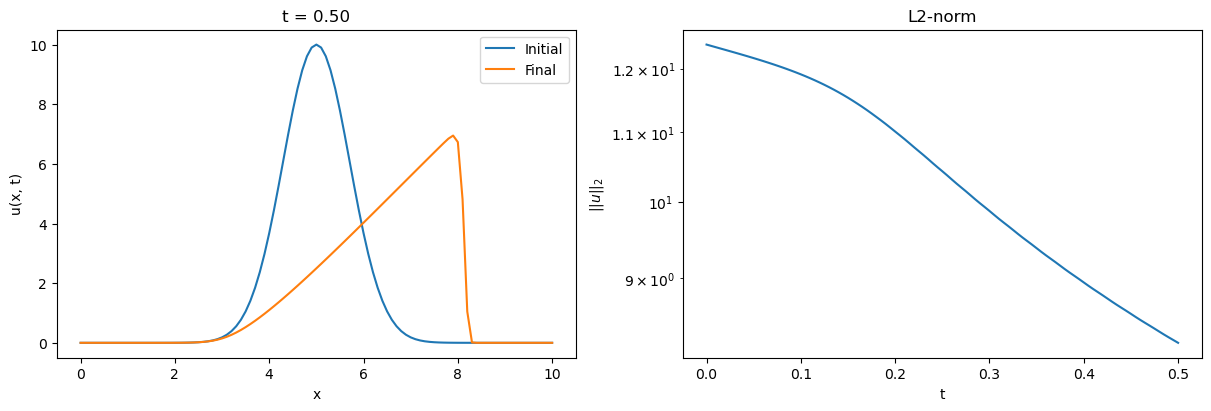

In [13]:
# Plot the final solution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

ax1.plot(x, u_in, label='Initial')
ax1.plot(x, u_f[-1], label='Final')
#ax1.plot(x, np.exp(-(x - a * time[-1] - x0)**2), label='Analytical')

ax1.set_title(f't = {time[-1]:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x, t)')
#ax1.set_ylim(0,1.1)

ax1.legend()


ax2.plot(time, norm)
ax2.set_yscale('log')

ax2.set_title('L2-norm')
ax2.set_xlabel('t')
ax2.set_ylabel(r'$||u||_{2}$')

plt.show()

# MOVIE CREATION

In [24]:
# Name of the directory with images

directory = './images-nfc'

In [25]:
# Create the directory if not existing
print(os.getcwd())

os.makedirs(directory)
os.listdir('./')

/home/studente/Documents/MD-Astrophysics/NR/NR-24-25/H01


['H01.ipynb',
 'images-ftcs',
 '.ipynb_checkpoints',
 'movie-lf.mp4',
 'H01-ov.ipynb',
 'movie.mp4',
 'images-lw',
 'images-lf',
 'images-leap',
 'movie-ftcs.mp4',
 'images-nfc']

In [26]:
# Save the plot of the results every n iterations

n = 5

for i, (t, nfc, fc) in enumerate(zip(time[::n], u_nfc[::n], u_fc[::n])):
    plt.plot(x, nfc)
    plt.plot(x, fc)
    
    plt.title(f't = {t:.2f}')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    #plt.ylim(0,1.5)
    
    plt.savefig(directory+'/'+str(i).zfill(5)+'.png', dpi=200)
    plt.close()

In [27]:
files = os.listdir(directory) # get the list of image files in the directory

files = sorted(files) # sort the files in alphanumeric order

movie = './movie.mp4'
with imageio.get_writer(movie, mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images-nfc/'+file)
        writer.append_data(image)
        
files=[]

In [28]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")